Index(['date', 'open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14',
       'cci_7', 'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd',
       'bollinger', 'TrueRange', 'atr_7', 'atr_14', 'target'],
      dtype='object')
         date       open       high        low      close     volume  \
0  2014-01-02  19.845715  19.893929  19.715000  19.754642  234684800   
1  2014-01-03  19.745001  19.775000  19.301071  19.320715  392467600   
2  2014-01-06  19.194643  19.528570  19.057142  19.426071  412610800   
3  2014-01-07  19.440001  19.498571  19.211430  19.287144  317209200   
4  2014-01-08  19.243214  19.484285  19.238930  19.409286  258529600   

       rsi_7     rsi_14       cci_7      cci_14     sma_50     ema_50  \
0  44.149614  50.996175 -105.071637  -42.411877  19.282236  19.265060   
1  33.094332  43.883529 -152.150999 -124.511983  19.297314  19.267243   
2  37.525661  45.858019 -132.306490 -130.122350  19.310864  19.273472   
3  34.055624  43.675708  -89.587009 -1

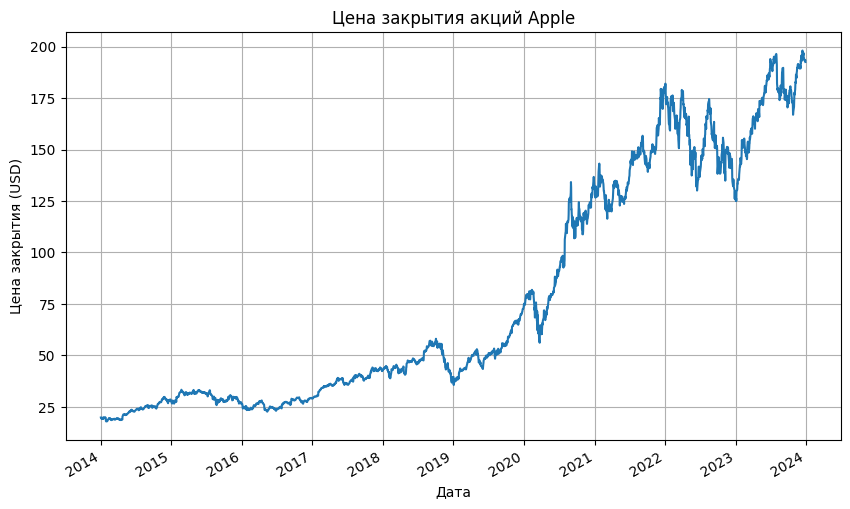

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("aapl_2014_2023.csv")


print(data.columns)


data.columns = data.columns.str.strip()


print(data.head())


data['date'] = pd.to_datetime(data['date']) 
data.set_index('date', inplace=True)  


data['close'].plot(figsize=(10, 6)) 
plt.title("Цена закрытия акций Apple")
plt.xlabel("Дата")
plt.ylabel("Цена закрытия (USD)")
plt.grid(True)
plt.show()




In [15]:
missing_values = data.isnull().sum()
print("Пропущенные значения:\n", missing_values)

Пропущенные значения:
 open         0
high         0
low          0
close        0
volume       0
rsi_7        0
rsi_14       0
cci_7        0
cci_14       0
sma_50       0
ema_50       0
sma_100      0
ema_100      0
macd         0
bollinger    0
TrueRange    0
atr_7        0
atr_14       0
target       0
dtype: int64


               open      high       low     close    volume     rsi_7  \
open       1.000000  0.999874  0.999848  0.999686 -0.494529 -0.006805   
high       0.999874  1.000000  0.999813  0.999849 -0.491974 -0.005644   
low        0.999848  0.999813  1.000000  0.999856 -0.497941 -0.000940   
close      0.999686  0.999849  0.999856  1.000000 -0.495210  0.000358   
volume    -0.494529 -0.491974 -0.497941 -0.495210  1.000000 -0.161219   
rsi_7     -0.006805 -0.005644 -0.000940  0.000358 -0.161219  1.000000   
rsi_14     0.000082 -0.000052  0.005072  0.005035 -0.173637  0.936345   
cci_7     -0.003943 -0.001735  0.001756  0.003386 -0.120441  0.814011   
cci_14     0.014084  0.014920  0.019368  0.019613 -0.152246  0.907657   
sma_50     0.993569  0.993832  0.993216  0.993431 -0.486200 -0.067837   
ema_50     0.995622  0.995831  0.995322  0.995476 -0.489103 -0.059787   
sma_100    0.989020  0.989361  0.988752  0.989007 -0.489969 -0.066829   
ema_100    0.992114  0.992403  0.991852  0.992065 -

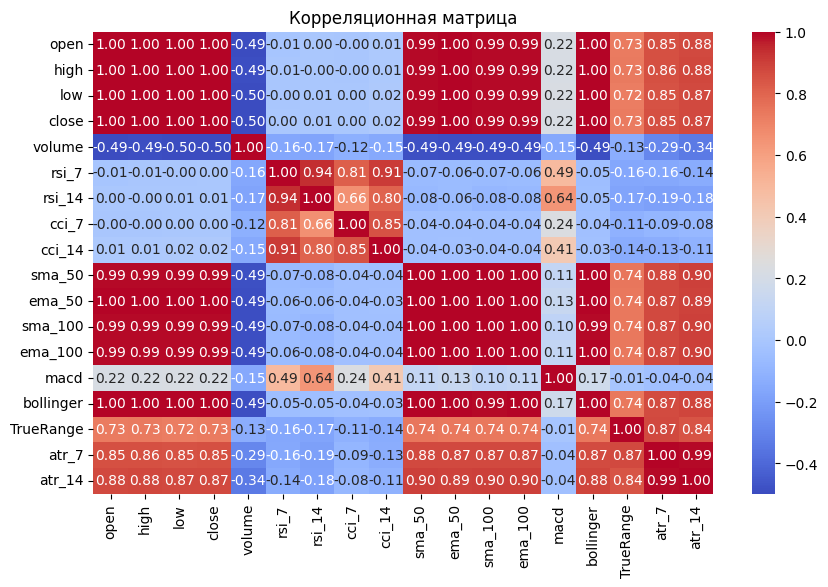

In [ ]:

numeric_data = data.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_data.corr()
print(correlation_matrix)

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()



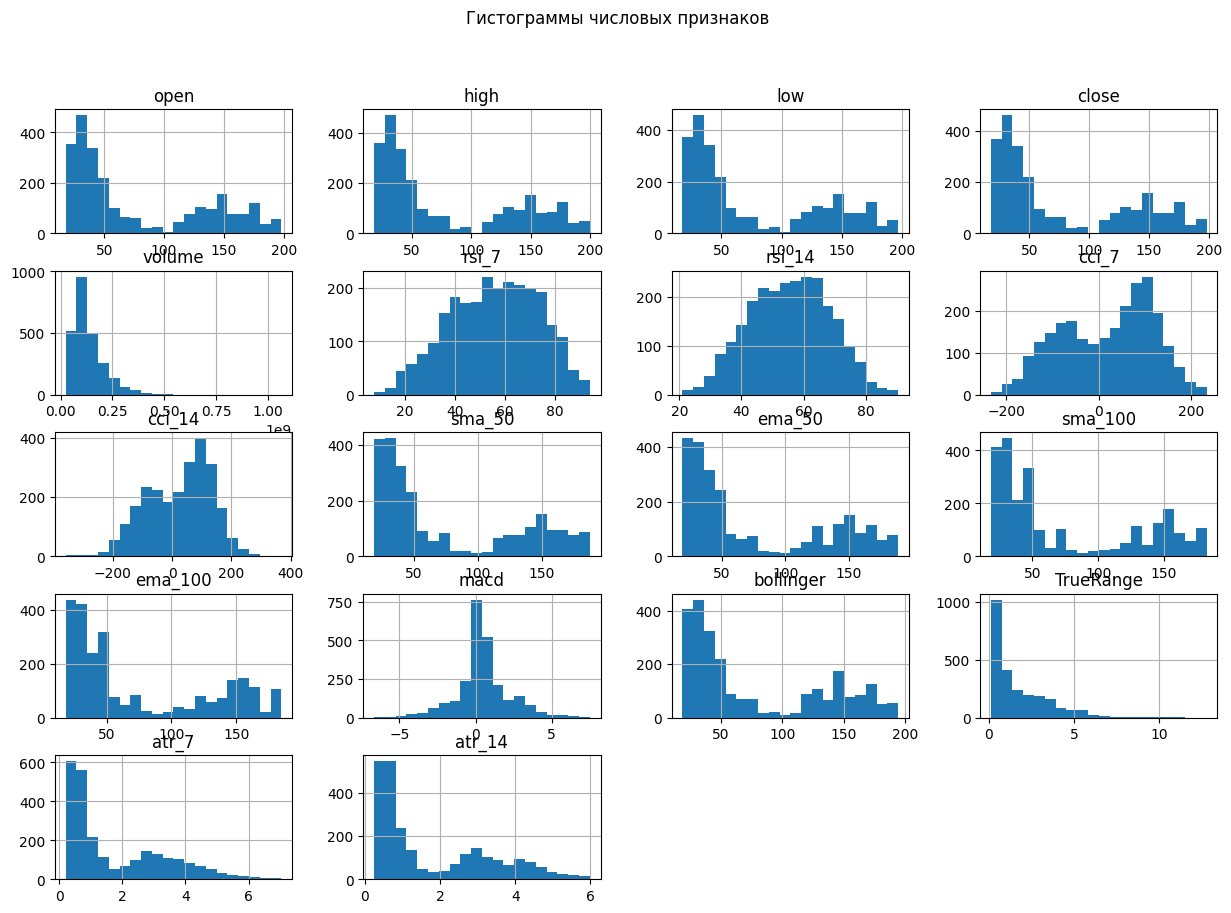

In [ ]:

numeric_data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Гистограммы числовых признаков")
plt.show()


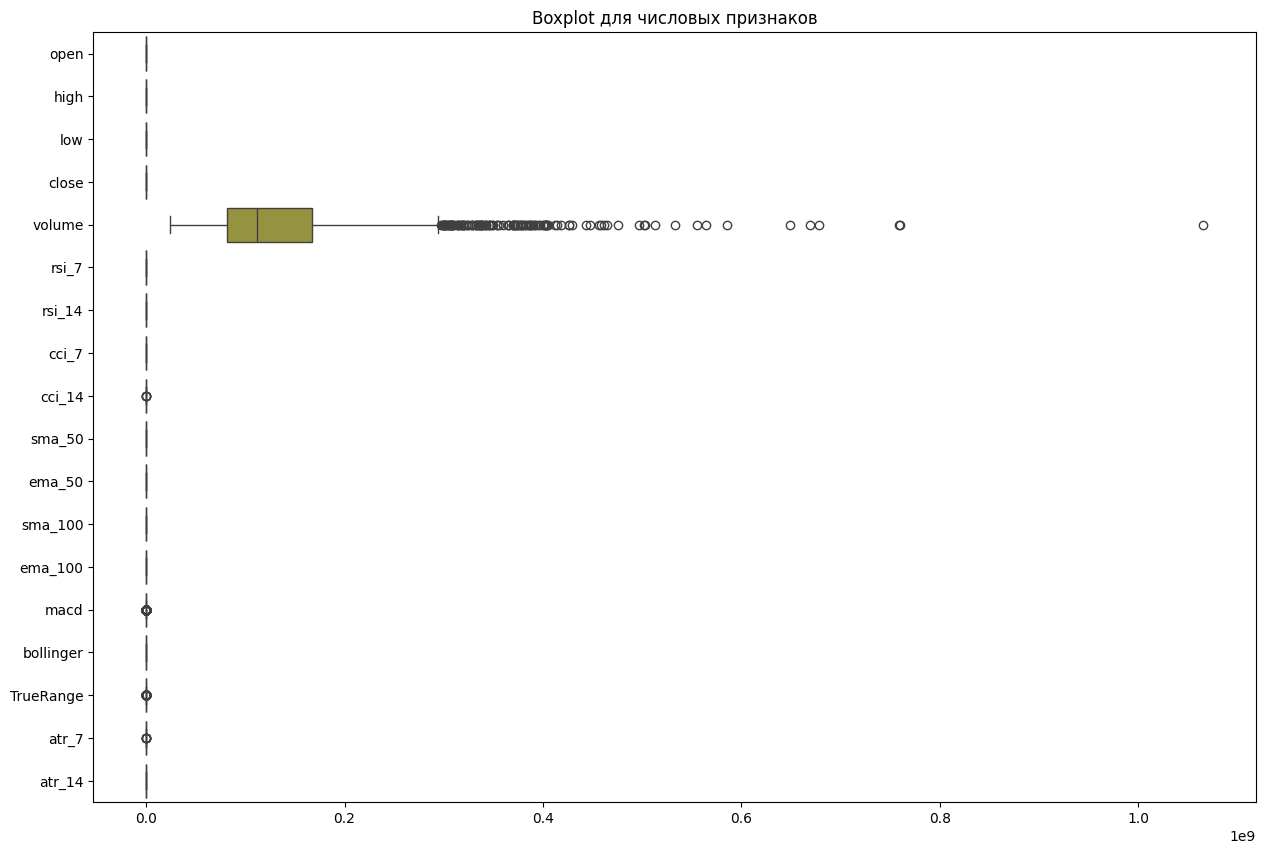

In [ ]:

import seaborn as sns
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_data, orient="h")
plt.title("Boxplot для числовых признаков")
plt.show()


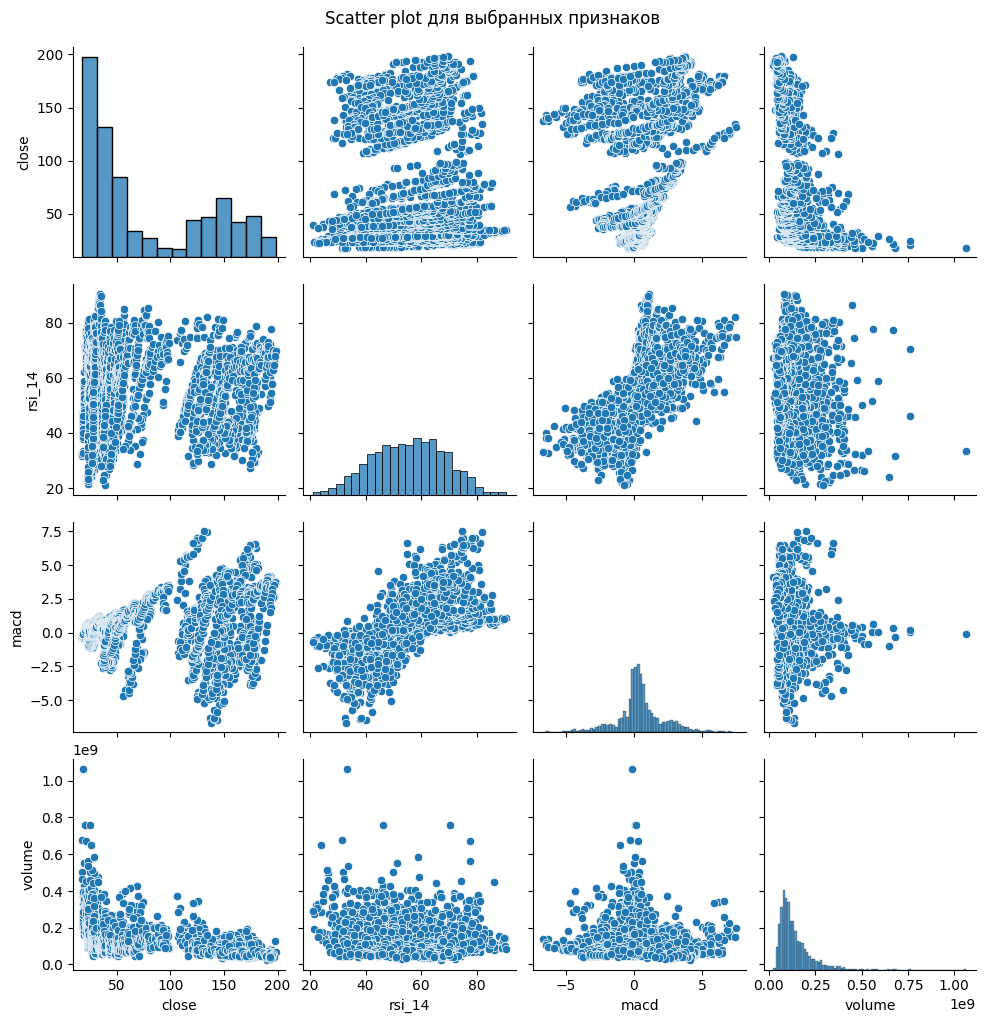

In [ ]:

sns.pairplot(numeric_data[['close', 'rsi_14', 'macd', 'volume']])
plt.suptitle("Scatter plot для выбранных признаков", y=1.02)
plt.show()


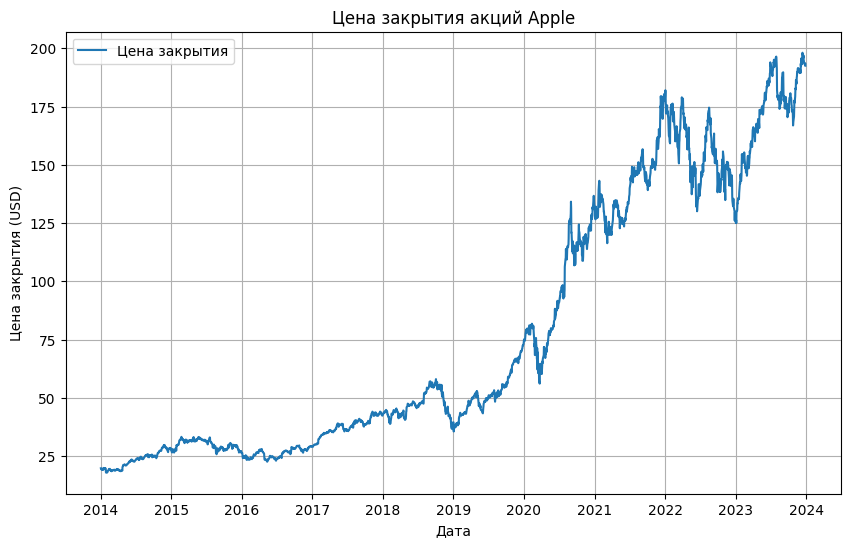

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(data.index, data['close'], label='Цена закрытия')
plt.title('Цена закрытия акций Apple')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (USD)')
plt.grid(True)
plt.legend()
plt.show()


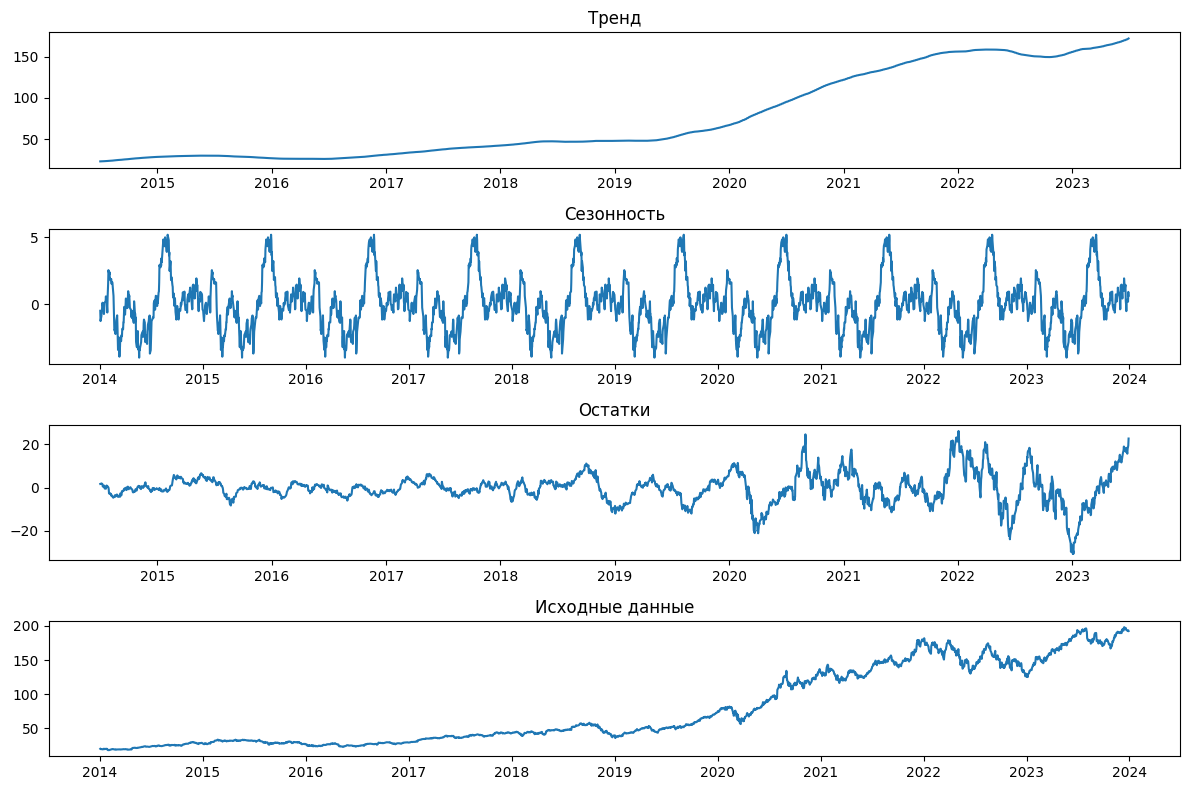

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Разложение временного ряда на тренд, сезонность и остатки
result = seasonal_decompose(data['close'], model='additive', period=252)

# Визуализация результатов разложения
plt.figure(figsize=(12, 8))


plt.subplot(411)
plt.plot(result.trend)
plt.title('Тренд')


plt.subplot(412)
plt.plot(result.seasonal)
plt.title('Сезонность')


plt.subplot(413)
plt.plot(result.resid)
plt.title('Остатки')

plt.subplot(414)
plt.plot(data['close'])
plt.title('Исходные данные')

plt.tight_layout()
plt.show()


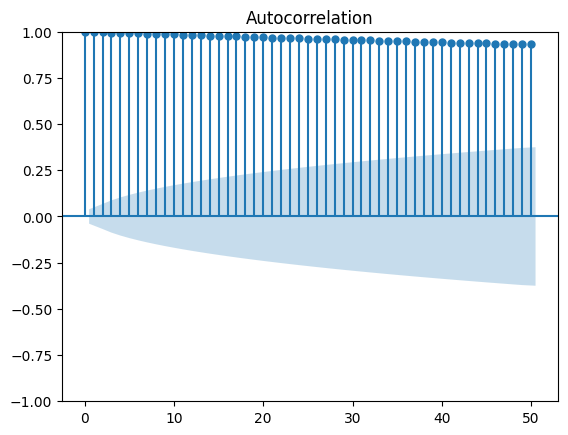

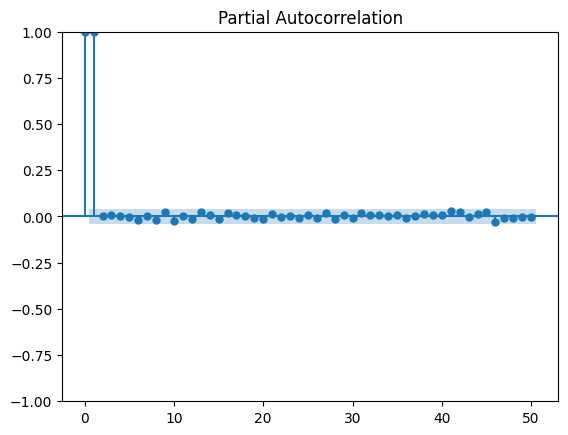

C:\Users\Modni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Modni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Modni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

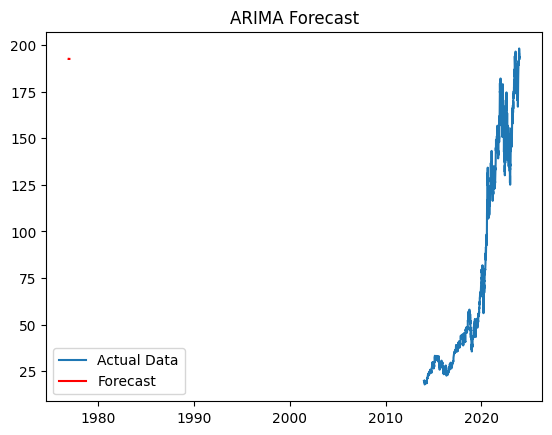

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


plot_acf(data['close'], lags=50)
plot_pacf(data['close'], lags=50)
plt.show()


model = ARIMA(data['close'], order=(5, 1, 0))  
model_fit = model.fit()


forecast = model_fit.forecast(steps=30)


plt.plot(data['close'], label='Actual Data')
plt.plot(range(len(data), len(data) + 30), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


In [ ]:

data['target'] = data['target'].map({'bearish': 0, 'bullish': 1}) 


lagged_data = create_lagged_features(data)


X = lagged_data.drop(columns=['close'])
y = lagged_data['close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Прогнозирование
y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


last_known = X.tail(1)
future_pred = rf_model.predict(last_known)
print(f'Next predicted value: {future_pred[0]}')


Mean Squared Error: 25.718037692412338
Next predicted value: 177.70370072000003


Mean Absolute Error (MAE): 3.1804897533622927
Root Mean Squared Error (RMSE): 5.053186649349859
Mean Absolute Percentage Error (MAPE): 1.8710019662477373%


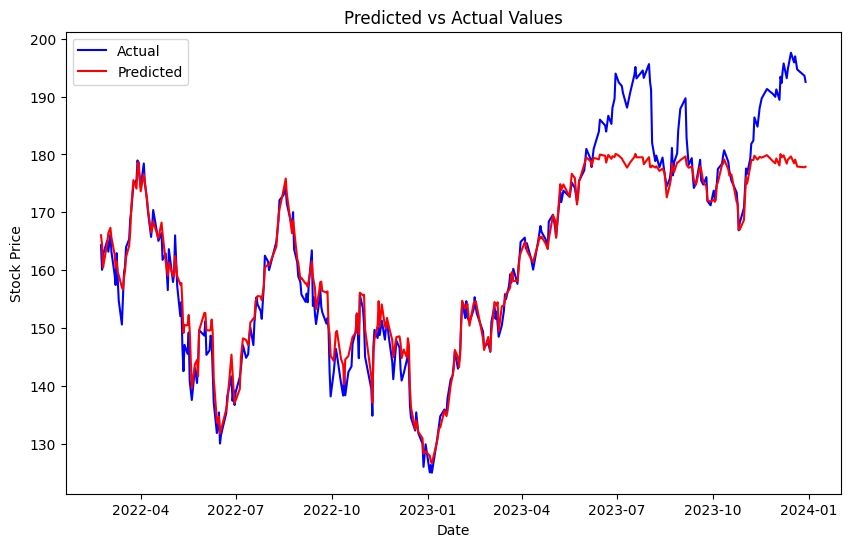

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lagged_data = create_lagged_features(data)
X = lagged_data.drop(columns=['close'])
y = lagged_data['close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Predicted vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
